# Exercício 4

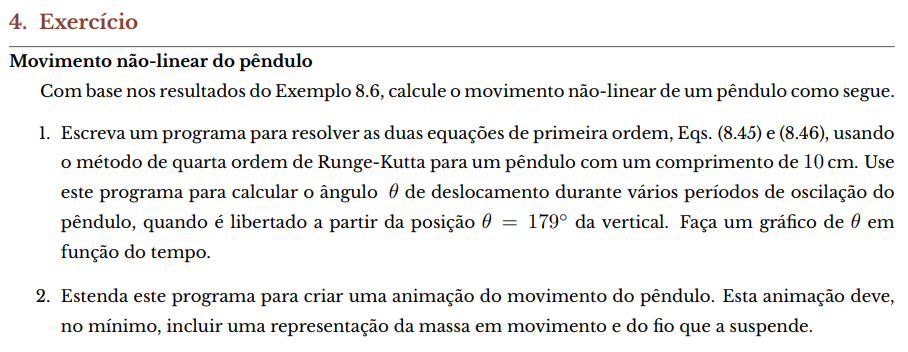

In [1]:
from typing import Callable
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

## Alínea 1

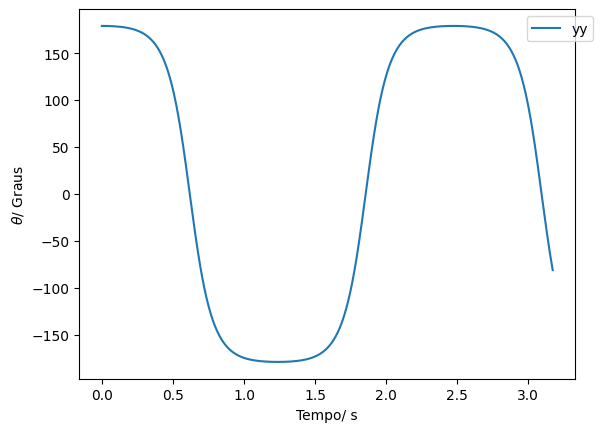

In [2]:
def leapfrog(start: float, end: float, func: Callable, N: int, x0: (float | np.ndarray)) -> tuple[np.ndarray, np.ndarray]:
    """
        Resolve o sistema de K EDOs `dx/dt = func(x, t)` usando o método Leapfrog começando em `start` e terminando em `end` com `N` passos sendo `x(start) = x0`.

        A função `func` deve aceitar dois argumentos: um array `x` com K entradas e um float `t`. O argumento `x0` deve também ter K entradas.

        ### Retorno
        tt: Array com os valores da variável independente `t`
        xx: Array com os resultados em função de `t` sendo que para K > 1 cada elemento do array é um array com o valor das várias funções em `t`.
    """

    # Passo
    h = (end - start) / N
    tt = [start]
    xx = [x0]

    # Valor de x(t + h/2)
    xleap = x0 + h * func(x0, start) / 2

    xh = x0
    th = start
    for _ in range(N):
        # Valor de x(t + h)
        xh = xh + h * func(xleap, th + h/2)
        th = th + h

        # Valor de x(t + h * 3/2)
        xleap = xleap + h * func(xh, th)
        
        xx += [xh]
        tt += [th]
    
    return np.array(tt), np.array(xx)


# Constantes
g = 9.81
l = 0.1
def f(r: np.ndarray, t: float) -> np.ndarray:
    global g, l
    k = g/l

    theta, omega = r[0], r[1]

    return np.array([omega, -k * np.sin(theta)])


# Estimativa de período
Tau = (2*np.pi) / np.sqrt(g/l)

theta0 = 179 / 180 * np.pi

tt, sol = leapfrog(0, 5*Tau, f, 2000, np.array([theta0, 0]))
theta = np.array([item[0] for item in sol])
omega = np.array([item[1] for item in sol])

plt.plot(tt, theta * 180 / np.pi, label="yy")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("Tempo/ s")
plt.ylabel("$\\theta$/ Graus")
plt.show()